In [8]:
# Copyright 2020 Keren Ye, University of Pittsburgh
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import json

from absl import app
from absl import flags
from absl import logging

import matplotlib.pyplot as plt
import networkx as nx
import textwrap

scenegraph_annotations_file = "/afs/cs.pitt.edu/usr0/key36/work2/WSSGG/data/annotations/scenegraphs_val2017.json"

logging.set_verbosity(logging.INFO)

with open(scenegraph_annotations_file, 'r') as fid:
  images = json.load(fid)
data_iter = iter(images)

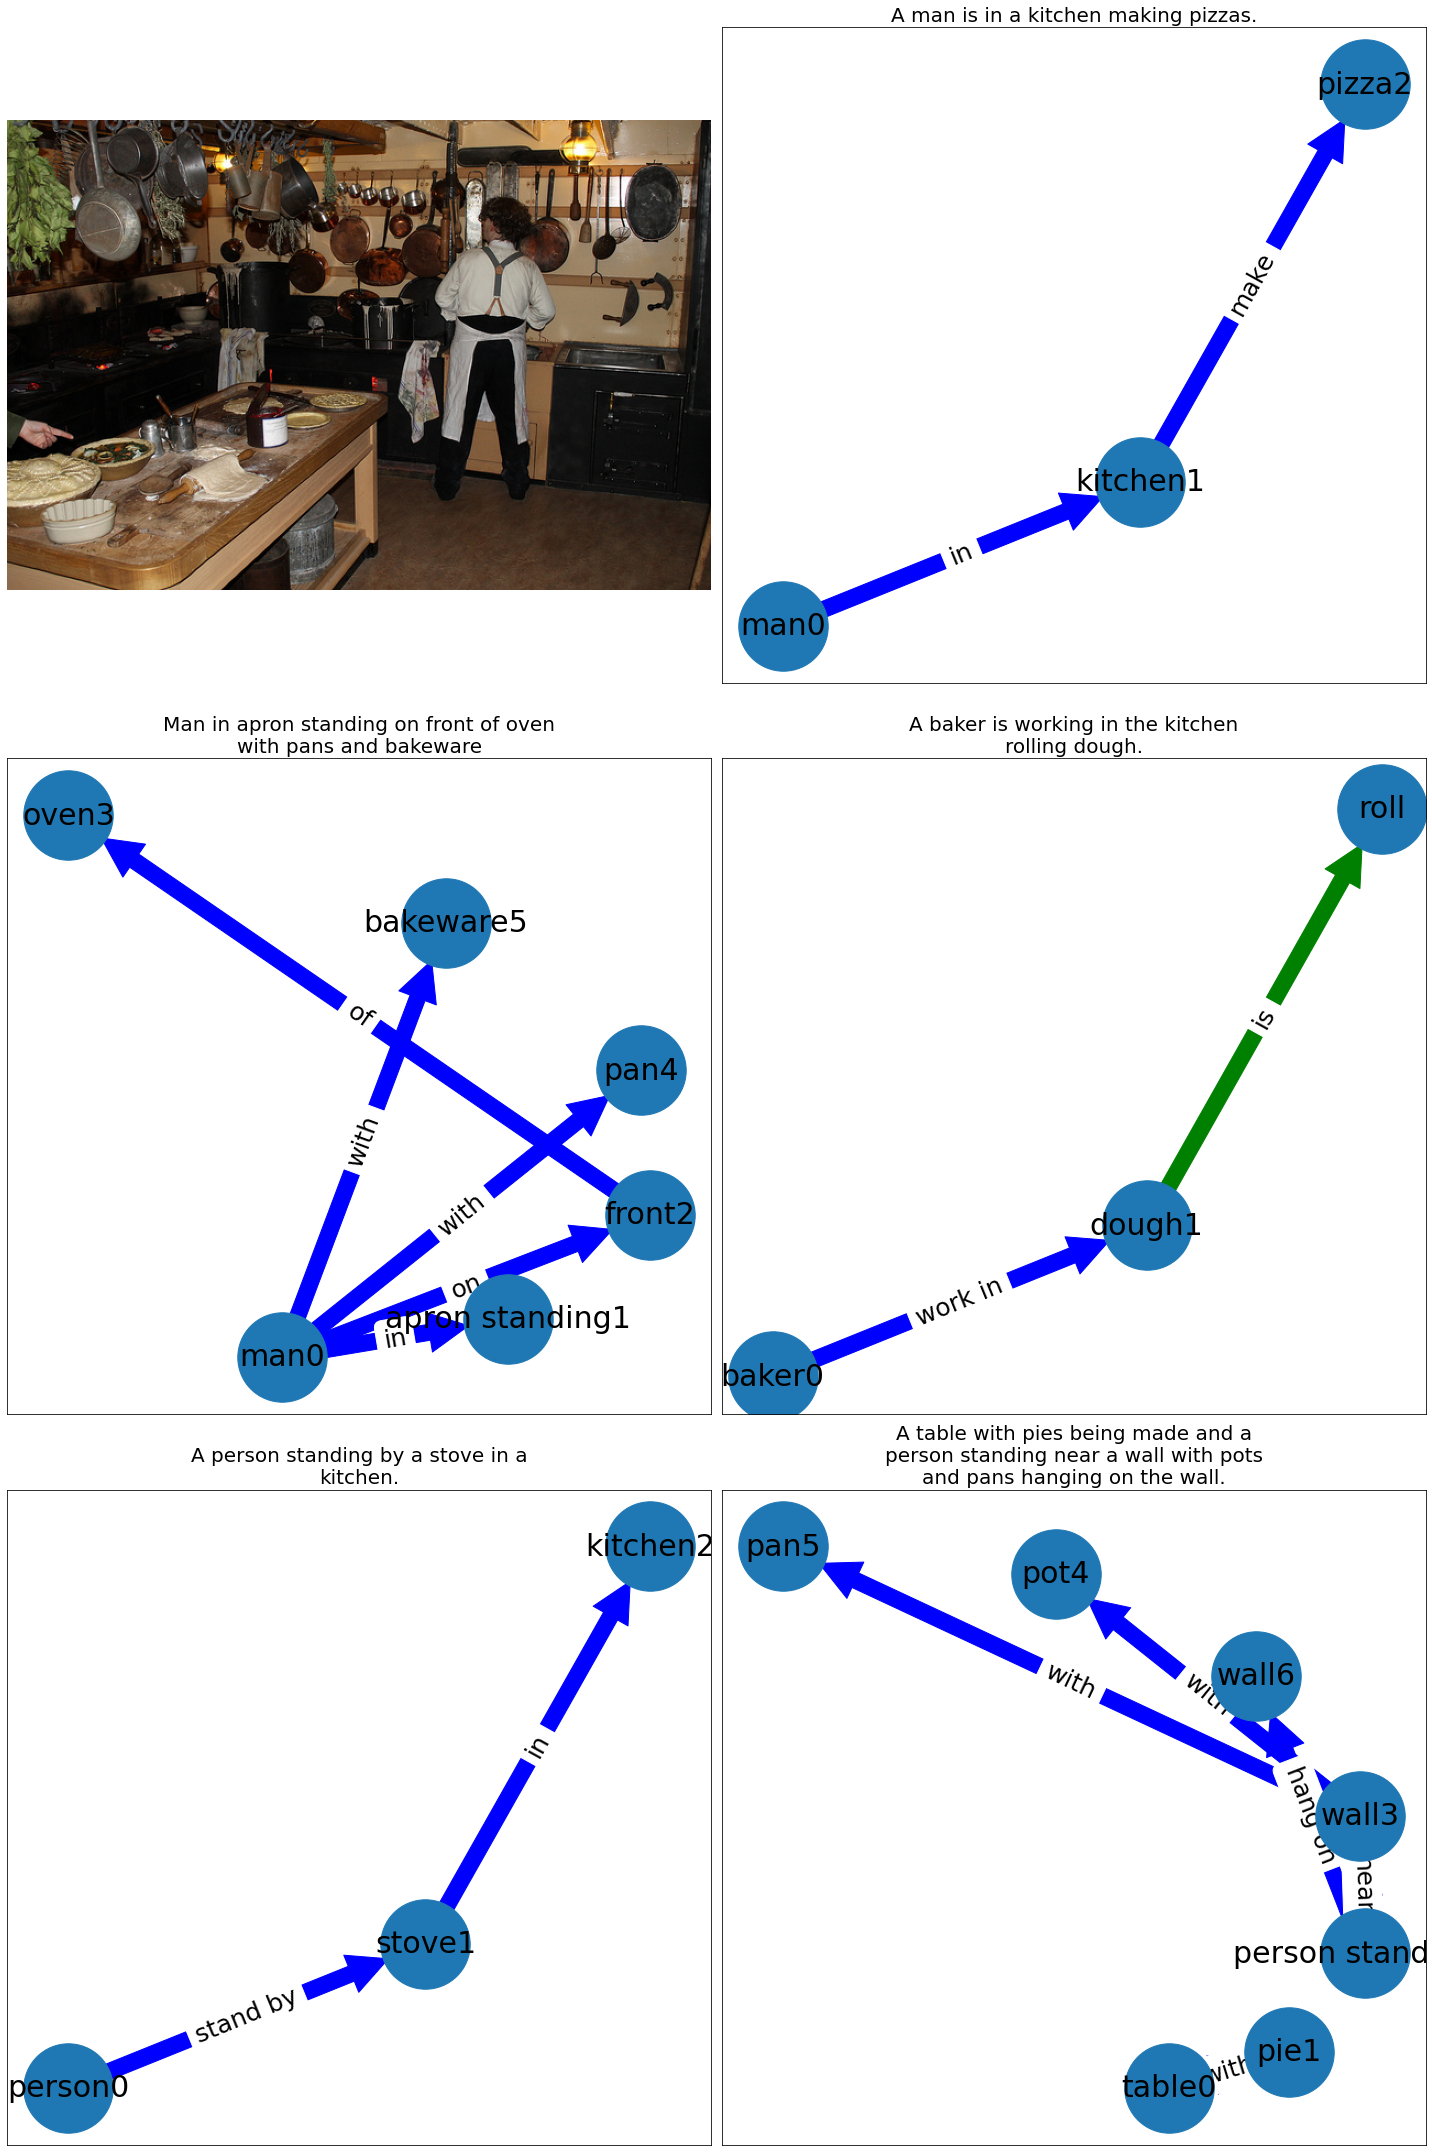

In [9]:
image = next(data_iter)
image_data = plt.imread(image['coco_url'], format='jpg')

plt.figure(figsize=(20, 30))

# Plot image.
plt.subplot(3, 2, 1)
plt.imshow(image_data)
plt.axis('off')

# Plot scene graphs.
plt_id = 2

for sg in image['scene_graphs']:
  ax = plt.subplot(3, 2, plt_id)
  ax.set_title('\n'.join(textwrap.wrap(sg['phrase'], 40)), fontsize=20)
  plt_id += 1

  g = nx.DiGraph()

  # Relations.
  relation_edges = []
  for r in sg['relationships']:
    assert len(r['text']) == 3
    from_node, to_node = (r['text'][0] + str(r['subject']),
                          r['text'][2] + str(r['object']))
    g.add_edge(from_node, to_node, label=r['predicate'], weight=0)
    relation_edges.append((from_node, to_node))

  # Attributes.
  attribute_edges = []
  for a in sg['attributes']:
    assert len(a['text']) == 3
    from_node, to_node = (a['text'][0] + str(a['subject']), a['text'][2])
    g.add_edge(from_node, to_node, label=a['predicate'], weight=1)
    attribute_edges.append((from_node, to_node))
    
  # Draw graph.
  pos = nx.spiral_layout(g)
  nx.draw_networkx_nodes(g, pos, node_size=8000, node_shape='o')
  nx.draw_networkx_edges(g, 
                         pos, 
                         edgelist=relation_edges, 
                         edge_color='b', 
                         arrowsize=80, 
                         arrowstyle='simple', 
                         min_target_margin=40)
  nx.draw_networkx_edges(g, 
                         pos, 
                         edgelist=attribute_edges, 
                         edge_color='g', 
                         arrowsize=80, 
                         arrowstyle='simple', 
                         min_target_margin=40, 
                         style='dashed')

  nx.draw_networkx_labels(g, pos, font_family='sans-serif', font_size=30)
  nx.draw_networkx_edge_labels(
    g,
    pos,
    font_size=25,
    edge_labels=dict([
      ((u, v), d['label']) for u, v, d in g.edges(data=True)
    ]))

plt.tight_layout()